In [1]:
# DIRECTORY SET
import os
import sys
import traceback
from pathlib import Path
base_dir=Path(os.getcwd()).parent.parent
os.chdir(base_dir)
print(os.getcwd())

# ENVIRONMENT VARIABLES
import dotenv
dotenv.load_dotenv()

# DJANGO SETUP
import django
sys.path.append(os.path.abspath(''))
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "serverproject.settings")
django.setup()

# Import async modules
import asyncio
from asgiref.sync import sync_to_async

# Import display modules
from IPython.display import display, Markdown

# Import other modules
import faiss

# import reloading
from importlib import reload

# Enable autoreload
%load_ext autoreload
%autoreload 2

# Import custom modules
from destinyapp.models import StreamRecapData

from destinyapp.customlibrary import services
from destinyapp.customlibrary import utils
from destinyapp.customlibrary import controller

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from collections import defaultdict
import textwrap
import numpy as np
from IPython.display import display

d:\DestinyFolder\DestinyRecaps\DestinyRecapsApi\serverproject


# Load Data

In [24]:
# Input parameter
video_id="OqVH_MTBQ6k"

# load data from testing_visualization_annotation_results.json
import json
with open(f"testing_visualization_data_gen.json", "r") as f:
    data_gen=json.load(f)

annotated_results=data_gen["annotated_results"]
major_topics=data_gen["major_topics"]
minor_topics=data_gen["minor_topics"]

stream_recap_data=await utils.get_recap_data(video_id)

plot_segments, category_locations, color_dict = await services.RV.create_segments(stream_recap_data.linked_transcript, annotated_results, major_topics, stream_recap_data.transcript)

# Shove Data

In [21]:
# Overall plot
background_color=96
plotting_width=10
plotting_height=10

# Bar 
bar_height_setting=0.15

# Abstraction Position
upper_y=0.45
lower_y=0.3
circle_size_multiplier=0.1
circle_size_offset=0.08
abstraction_width_cutoff=0.05

# Meta 
central_y = 0.7


In [22]:
plot_object=services.RV.PlotObject()

# Define Segments
plot_object.segments=[]
for segment in plot_segments:
    segment["x"]=None
    seg_obj=services.RV.Segment(**segment)
    plot_object.segments.append(seg_obj)

# Define time_normalization
plot_object.time_normalization=services.RV.TimeNormalization(net_duration=plot_object.segments[-1].end-plot_object.segments[0].start, start_offset=plot_object.segments[0].start)

# Define Abstractions
for segment in plot_object.segments:
    abstraction=plot_object.abstractions.get(segment.category, None)
    if abstraction:
        plot_object.abstractions[segment.category].width+=segment.width
    else:
        plot_object.abstractions[segment.category]=services.RV.Abstraction(width=segment.width, color=segment.color, x=None, y=None, size=None)

    segment.x=(((segment.start+segment.end)/2)-plot_object.time_normalization.start_offset)/plot_object.time_normalization.net_duration

# Define circle size
def get_circle_size(total_width):
    return (((np.sqrt(total_width) * circle_size_multiplier)*2)+circle_size_offset)

# define abstraction size
total_abstraction_width=0
for category, abstraction in plot_object.abstractions.items():
    if category=="non categorized":
        continue
    abstraction.size=get_circle_size(abstraction.width)
    total_abstraction_width+=abstraction.size

# define abstraction x
number_of_abstractions=len(plot_object.abstractions.values())
circle_zone_size=1-(abstraction_width_cutoff*2)
between_circle_padding=(circle_zone_size-total_abstraction_width)/(number_of_abstractions-2)

last_x=abstraction_width_cutoff-between_circle_padding

for i, category in enumerate(list(category_locations.keys())):
    if category=="non categorized":
        continue
    plot_object.abstractions[category].x=last_x+(plot_object.abstractions[category].size/2)+between_circle_padding

    last_x=plot_object.abstractions[category].x+(plot_object.abstractions[category].size/2)
    if i%2==0:
        plot_object.abstractions[category].y=upper_y
    else:
        plot_object.abstractions[category].y=lower_y

# Plot it

non categorized 0.3298881253904253
minor topics 0.13777045828837525
Biden's Decision Not to Seek Re-election 0.04764609006757908
Kamala Harris as Potential Democratic Nominee 0.10710432165369979
Trump's Actions and Republican Party 0.1358964166051451
Immigration and Asylum Policy 0.10324266000340737
Analysis of Federalist Paper No. 78 0.13845192799136807


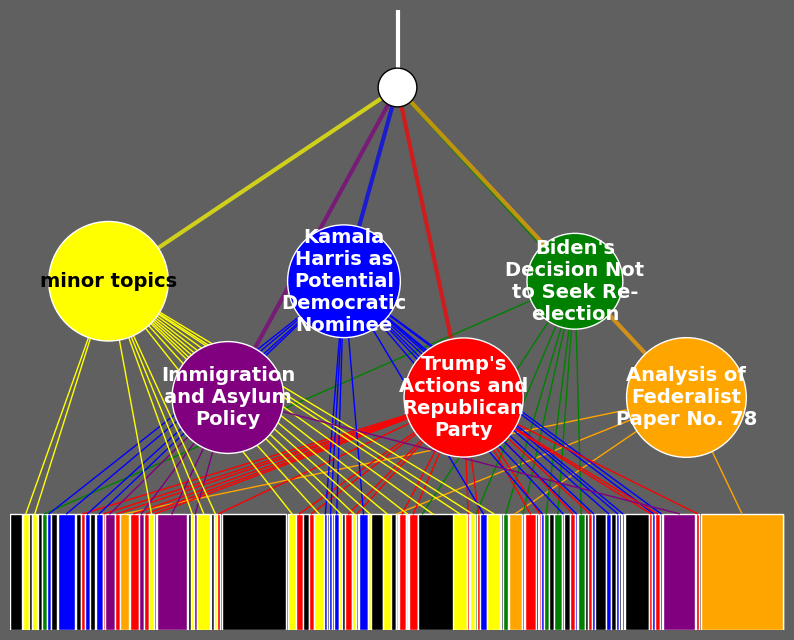

In [23]:
# Create the plot with a specific gray background
fig, ax = plt.subplots(figsize=(plotting_width, plotting_height))
hex_background_color = '#%02x%02x%02x' % (int(background_color), int(background_color), int(background_color))
fig.patch.set_facecolor(hex_background_color)  # Set figure background to [96, 96, 96]
ax.set_facecolor(hex_background_color)  # Set axes background to [96, 96, 96]
target_plot_width=10
plt.close(fig)

# Plot BAR 
current_x = 0
category_info = defaultdict(lambda: {"total_width": 0, "segments": []})

bar_height = bar_height_setting*plotting_height

clickable_area_x_offset=0.085
clickable_area_y_offset=0.1
clickable_y_height_multiplier=1.22
clickable_areas=[]
href_base="https://youtu.be/"+video_id+"?t="

for i, segment in enumerate(plot_object.segments):
    ax.add_patch(plt.Rectangle((((segment.x-(segment.width/2))*plotting_width), 0), segment.width*plotting_width, bar_height, 
                            facecolor=segment.color, edgecolor='white'))
    current_x += segment.width
total_width = current_x



# Calculate Circle Padding
circle_zone_size=9
circle_y = 3.5
circle_y = 2.78
circle_size_variable = 0.15
circle_size_variable = 0.13
circle_base_size_variable=0.3
circle_base_size_variable=0.41

# current_x=
circle_x_locations={}
total_circles_width=0
def get_circle_width(total_width):
    return (((np.sqrt(total_width) * circle_size_variable)*2)+circle_base_size_variable)

alterating_bool=False
vertical_offset_value=0.5
vertical_offset_value=0.65

# Add central white circle
central_circle = plt.Circle((plotting_width/2, central_y*plotting_height), 0.25, facecolor='white', edgecolor='black', zorder=12)
ax.add_artist(central_circle)


for category, abstraction in plot_object.abstractions.items():
    print(category, abstraction.width)

    if category == 'non categorized':
        continue

    # Calculate x position for the circle (center of all segments of this category)
    if alterating_bool:
        alterating_bool=False
        vertical_offset=-vertical_offset_value
    else:
        vertical_offset=vertical_offset_value
        alterating_bool=True

    # PLOT CIRCLES
    circle = plt.Circle((abstraction.x*plotting_width, abstraction.y*plotting_width), (abstraction.size/2)*plotting_width, facecolor=abstraction.color, edgecolor='white', zorder=10)
    ax.add_artist(circle)

    # PLOT CIRCLE LABELS, set width to circle size and wrap
    text_wrap=textwrap.fill(category, width=12)
    bubble_font_size_text=14
    if abstraction.color=="yellow":
        ax.text(abstraction.x*plotting_width, abstraction.y*plotting_height, text_wrap, ha='center', va='center', color='black', fontsize=bubble_font_size_text, zorder=11, fontweight='bold')
    else:
        ax.text(abstraction.x*plotting_width, abstraction.y*plotting_height, text_wrap, ha='center', va='center', color='white', fontsize=bubble_font_size_text, zorder=11, fontweight='bold')

    # Make lines to center circle
    ax.plot([abstraction.x*plotting_width, plotting_width/2], [abstraction.y*plotting_height, central_y*plotting_height], color=abstraction.color, linewidth=3, linestyle='-', alpha=0.7, zorder=9) 

# make lines to the circles
for segment in plot_object.segments:
     abstraction=plot_object.abstractions[segment.category]
     if segment.x and abstraction.y:
          ax.plot([segment.x*plotting_width, abstraction.x*plotting_width], [bar_height, abstraction.y*10], color=segment.color, linewidth=1)  


# Add white line extending upward from central circle
top_y = 100  # Adjust this value to change the length of the line
ax.plot([plotting_width/2, plotting_width/2], [central_y*plotting_height, plotting_height], color='white', linewidth=3, solid_capstyle='round')  # Added white line

# Customize the plot
ax.set_xlim(0, total_width*plotting_width)
ax.set_ylim(0, 8)
ax.set_aspect('equal', adjustable='box')
ax.axis('off')
display(fig)
